In [1]:
#1. Download Bitcoin price data
#2. Combine with out wikipedia data from "Sentiment_Analysis"
#3. Create a machine learning model
#4. Backtesting, evaluating backtesting


#1. DOWNLOAD BITCOIN PRICE DATA
import yfinance as yf
import os
import pandas as pd

In [2]:
#Create ticker object to download price history of Bitcoin
#In this case we will be doing Bitcoin relative to US Dollar
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
#Download history of when yahoo finance started tracking bitcoin price
btc = btc_ticker.history(period="max")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-24 00:00:00+00:00,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,0.0,0.0
2023-11-25 00:00:00+00:00,37721.414062,37892.429688,37617.417969,37796.792969,9099571165,0.0,0.0
2023-11-26 00:00:00+00:00,37796.828125,37820.300781,37162.750000,37479.121094,13744796068,0.0,0.0


In [5]:
#Convert index to a datetime index
btc.index = btc.index.tz_localize(None)

In [6]:
#Delete unused columns IF YOU HAVE NOT DONE SO
del btc["Dividends"]
del btc["Stock Splits"]

<Axes: xlabel='Date'>

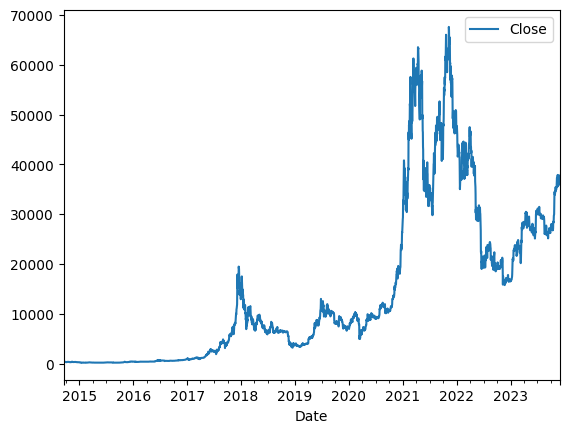

In [7]:
#plot a line graph according to closing price by date
btc.plot.line(y="Close", use_index=True)

In [8]:
#Read our wikipedia csv file from "Sentiment_Analysis"
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates = True)

In [9]:
wiki

,edit_count,sentiment,neg_sentiments
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-11-22,11.400000,-0.138429,0.285873
2023-11-23,13.366667,-0.122469,0.274944
2023-11-24,16.266667,-0.127673,0.276255
2023-11-25,16.466667,-0.158154,0.290541


In [10]:
#2. COMBINE WIKIPEDIA DATA FROM "SENTIMENT_ANALYSIS"

btc = btc.merge(wiki, left_index=True, right_index=True)

In [11]:
#Rows only start when both dataframes matches
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiments
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,11.400000,-0.138429,0.285873
2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,13.366667,-0.122469,0.274944
2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,16.266667,-0.127673,0.276255
2023-11-25,37721.414062,37892.429688,37617.417969,37796.792969,9099571165,16.466667,-0.158154,0.290541


In [12]:
#PREDICTION: Will the price of Bitcoin go up or down tomorrow?
btc["Tomorrow"] = btc["Close"].shift(-1)

In [13]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiments,Tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,11.400000,-0.138429,0.285873,37289.621094
2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,13.366667,-0.122469,0.274944,37720.281250
2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,16.266667,-0.127673,0.276255,37796.792969
2023-11-25,37721.414062,37892.429688,37617.417969,37796.792969,9099571165,16.466667,-0.158154,0.290541,37479.121094


In [14]:
#Set up "Target" column to see if price went up or down, up = 1, down = 0
btc["Target"] = (btc["Tomorrow"] > btc["Close"]).astype(int)

In [15]:
#Count the number of times the price went up vs down
btc["Target"].value_counts()

Target
1    1775
0    1583
Name: count, dtype: int64

In [16]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiments,Tomorrow,Target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,11.400000,-0.138429,0.285873,37289.621094,0
2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,13.366667,-0.122469,0.274944,37720.281250,1
2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,16.266667,-0.127673,0.276255,37796.792969,1
2023-11-25,37721.414062,37892.429688,37617.417969,37796.792969,9099571165,16.466667,-0.158154,0.290541,37479.121094,0


In [17]:
#3. TRAINING OUR BASELINE MACHINE LEARNING MODEL
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 50, random_state=1)

#Split our dataset to 2 sets, train set and test set
#Train model on training set, and evaluate it on test set
train = btc.iloc[:-200]
test = btc.iloc[-200:]

#Set up a list of predictors using columns to predict our target
predictors = ["Close", "Volume", "Open", "High", "Low", "edit_count", "sentiment", "neg_sentiments"]

#Fit the model using the predictors
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [18]:
#Make predictions and evaluate how effective our prediction is
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4772727272727273

In [19]:
#4. EVALUATING ERROR WITH BACKTESTING
#Improve the accuracy of our model using backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [20]:
#Backtest our model against several years of data instead of just 200 rows
#Step = 1095 --> About 3 years worth of data to predict the next year's outcome
def backtest(data, model, predictors, start = 1095, step = 150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i::(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [21]:
#USING AN XGBOOST MODEL "https://xgboost.readthedocs.io/en/stable/index.html"
from xgboost import XGBClassifier

#learning_rate --> defines if we want model to protect against overfitting, lower number = less likely to overfit
model = XGBClassifier(random_state = 1, learning_rate = .1, n_estimators = 200)

#generate predictions using backtesting
predictions = backtest(btc, model, predictors)

In [23]:
#Evaluate our precision score
#Comparing our actual values to predicted values
precision_score(predictions["Target"], predictions["predictions"])

#Number generated means how many times in % did we predicted correctly if Bitcoin will go up or down
#In this case we predicted correctly 57% of the time

0.5714285714285714